# Tube retraction characteristics charts
The purpose of these graphs is to analyze and compare the efficiency of different tube types in terms of their shortening behavior under pressure. Specifically to identify which combination of tube length, pressure, and outer diameter produces the largest percentage shortening while using the lowest possible pressure. The data will be used to determine the optimal tube length for exoskeleton control via pressurized muscles (tubes).

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# length in inch; color and type; length on 30psi in inches; length on 60psi  in inches; outer diameter in inches
data = [
    [30, "yellow latex", 24.25, 21.5, 0.375],
    [30, "black latex", 24.0, 21.5, 0.25],

    [24, "yellow latex", 20.0, 17.25, 0.375],
    [24, "black latex", 20.0, 17.0, 0.25],

    [18, "yellow latex", 14.75, 13.0, 0.375],
    [18, "black latex", 14.5, 12.5, 0.25],

    [12, "yellow latex", 10.0, 8.5, 0.375],
    [12, "black latex", 9.5, 8.25, 0.25]
]

df = pd.DataFrame(data, columns=["length_nominal", "material", "length_30psi", "length_60psi", "outer_diameter"])

# shrink percentage
df["shrink_30psi"] = (df["length_nominal"] - df["length_30psi"]) / df["length_nominal"] * 100
df["shrink_60psi"] = (df["length_nominal"] - df["length_60psi"]) / df["length_nominal"] * 100

color_pallete = palette=["#bcbc00", "#000000"]

# Percentage reduction based on length and material (outer diameter)
We can see that shorter the tube is, better contraction we get, also smaller outer diameter in black latex tube could also cause that it has higher shortening percentage.

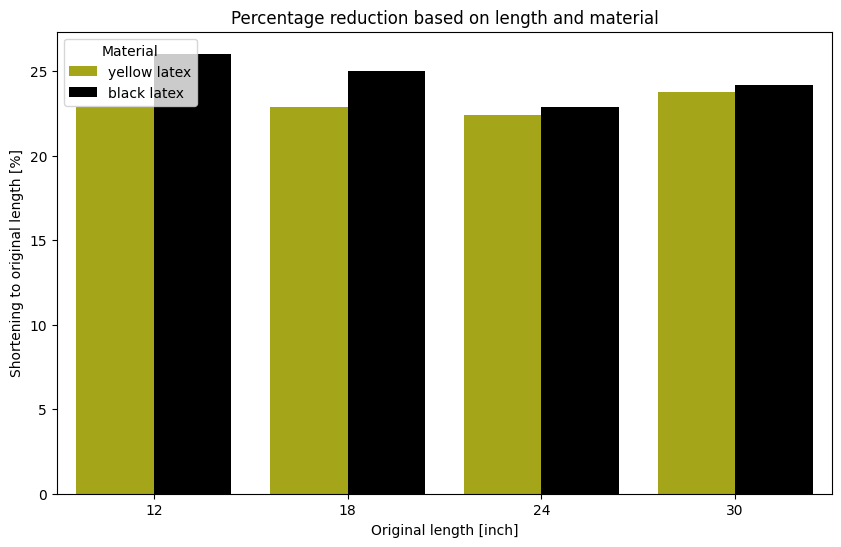

In [60]:
# --- Column chart ---
df_melt = df.melt(
    id_vars=["length_nominal", "material", "outer_diameter"],
    value_vars=["shrink_30psi", "shrink_60psi"],
    var_name="pressure", value_name="shrink_percent"
)

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x="length_nominal", y="shrink_percent", hue="material", palette=color_pallete, errorbar=None)
plt.title("Percentage reduction based on length and material")
plt.ylabel("Shortening to original length [%]")
plt.xlabel("Original length [inch]")
plt.legend(title="Material")
plt.show()

# Effect of Outer Diameter on Tube Shortening
Based on the measured data, it appears that the smaller the outer diameter, the higher the shortening percentage.

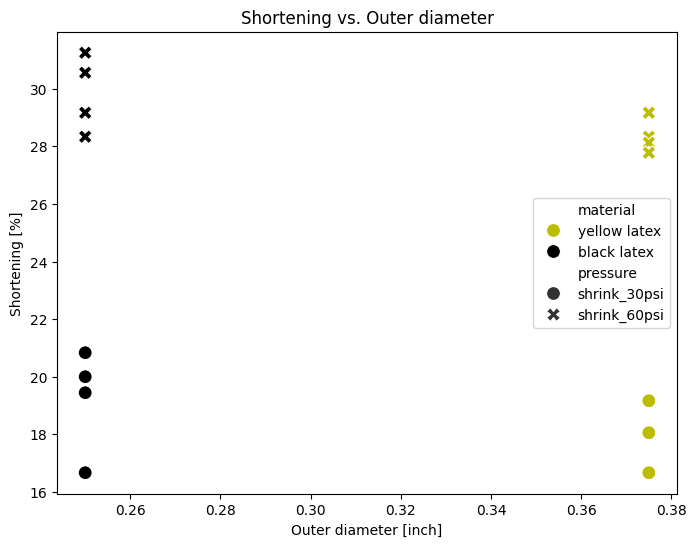

In [61]:
# --- Scatter chart ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_melt, x="outer_diameter", y="shrink_percent", hue="material", style="pressure", s=100, palette=color_pallete)
plt.title("Shortening vs. Outer diameter")
plt.xlabel("Outer diameter [inch]") # put correct color on data
plt.ylabel("Shortening [%]") # make it in 1/8, 2/8 ... inch
plt.show()

# Tube Shortening as a Function of Tube Length
From the measured data, we can see that the shorter the tube, the higher the shortening percentage.

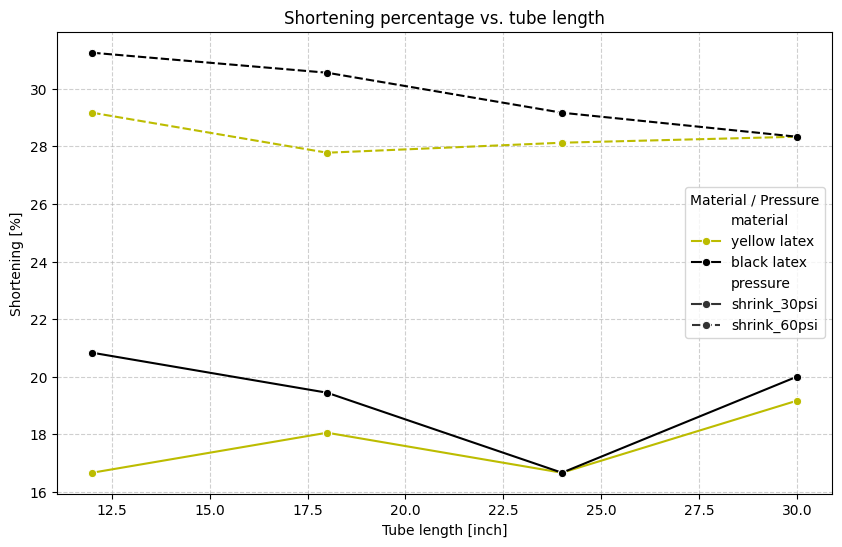

In [62]:
# --- Line chart: Shortening percentage vs tube length ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_melt,
    x="length_nominal",
    y="shrink_percent",
    hue="material",
    style="pressure",
    marker="o",
    palette=color_pallete
)
plt.title("Shortening percentage vs. tube length")
plt.xlabel("Tube length [inch]")
plt.ylabel("Shortening [%]")
plt.legend(title="Material / Pressure")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Effect of Tube Length and Diameter on Shortening Percentage
Each colored line connects points of the same material and pressure, showing how shortening changes with outer diameter and tube length. Gray lines connect tubes with the same length and pressure to highlight the effect of diameter and material on shortening.

From the plot, we can observe that shorter tubes generally achieve higher shortening percentages, and tubes with smaller outer diameters tend to contract more.

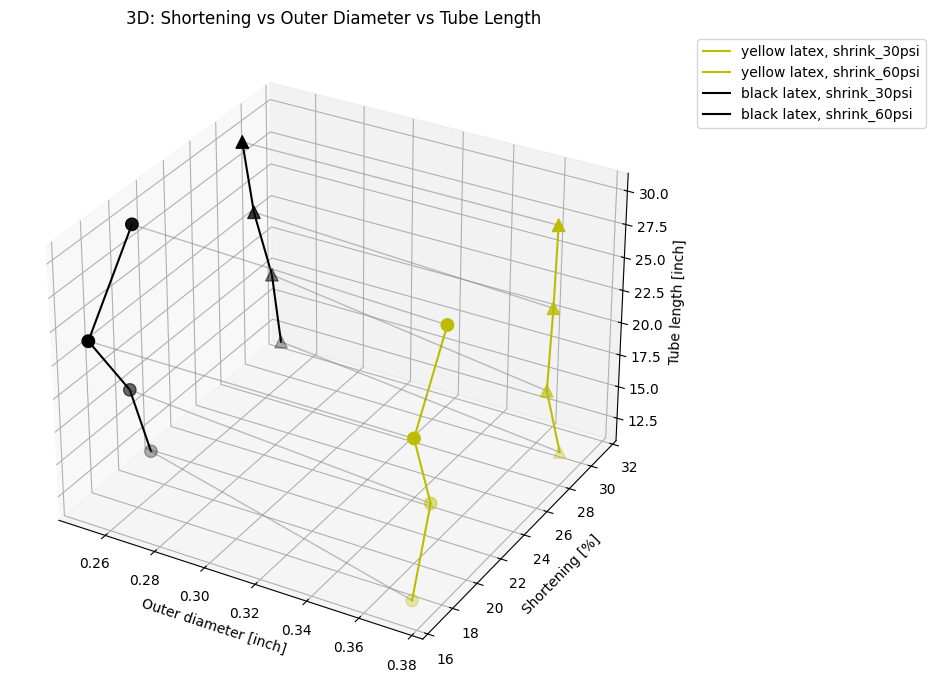

In [63]:
import matplotlib.pyplot as plt
import itertools

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

markers = {"shrink_30psi": "o", "shrink_60psi": "^"}

materials = df_melt["material"].unique()
pressures = df_melt["pressure"].unique()

base_colors = dict(zip(materials, itertools.cycle(color_pallete)))

for mat in materials:
    for pres in pressures:
        subset = df_melt[(df_melt["material"] == mat) & (df_melt["pressure"] == pres)]
        subset = subset.sort_values("length_nominal")
        ax.plot(
            subset["outer_diameter"],
            subset["shrink_percent"],
            subset["length_nominal"],
            label=f"{mat}, {pres}",
            color=base_colors[mat]
        )
        ax.scatter(
            subset["outer_diameter"],
            subset["shrink_percent"],
            subset["length_nominal"],
            s=80,
            marker=markers.get(pres, "o"),
            color=base_colors[mat]
        )

for length in df_melt["length_nominal"].unique():
    for pres in pressures:
        subset = df_melt[(df_melt["length_nominal"] == length) & (df_melt["pressure"] == pres)]
        if len(subset) > 1:
            ax.plot(
                subset["outer_diameter"],
                subset["shrink_percent"],
                subset["length_nominal"],
                color="gray", alpha=0.5, linewidth=1
            )

ax.set_title("3D: Shortening vs Outer Diameter vs Tube Length")
ax.set_xlabel("Outer diameter [inch]")
ax.set_ylabel("Shortening [%]")
ax.set_zlabel("Tube length [inch]")

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [64]:
import plotly.graph_objects as go

fig = go.Figure()

markers = {"30 psi": "circle", "60 psi": "triangle-up"}

materials = df_melt["material"].unique()
color_map = dict(zip(materials, color_pallete))

# Add traces for each material and pressure
for mat in materials:
    for pres in df_melt["pressure"].unique():
        subset = df_melt[(df_melt["material"] == mat) & (df_melt["pressure"] == pres)]
        subset = subset.sort_values("length_nominal")
        
        fig.add_trace(go.Scatter3d(
            x=subset["outer_diameter"],
            y=subset["shrink_percent"],
            z=subset["length_nominal"],
            mode="lines+markers",
            name=f"{mat}, {pres}",
            marker=dict(
                symbol=markers.get(pres, "circle"),
                size=5,
                color=color_map[mat]   # ← custom color
            ),
            line=dict(width=3, color=color_map[mat])  # ← line color
        ))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title="Outer diameter [inch]",
        yaxis_title="Shortening [%]",
        zaxis_title="Tube length [inch]"
    ),
    title="Interactive 3D: Shortening vs Outer Diameter vs Tube Length"
)

fig.show()


# Tube Efficiency: Shortening per PSI vs Tube Length
This line plot shows the efficiency of tubes, defined as the percentage of shortening per unit of applied pressure (shortening % per PSI), for different tube lengths, materials, and pressure levels. Each line represents a specific material under a given pressure, illustrating how efficiency changes with tube length. From the graph, we can observe that shorter tubes generally achieve higher efficiency, and the outer diameter and material influence the efficiency at both pressure levels.

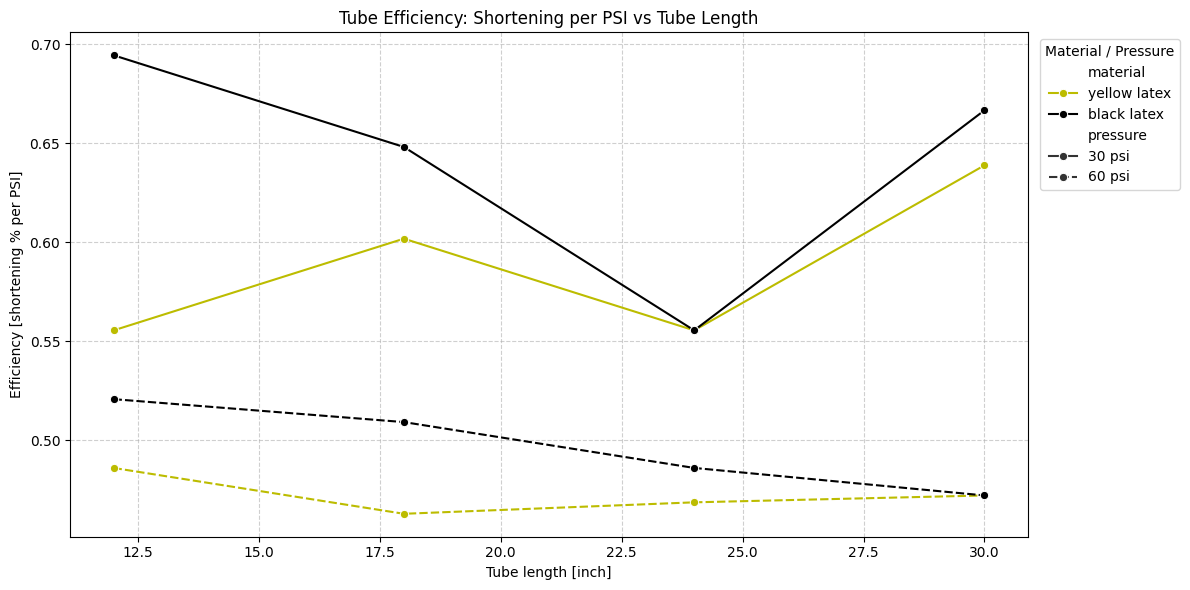

In [65]:
# Efficiency = shortening per psi
df["efficiency_30psi"] = df["shrink_30psi"] / 30
df["efficiency_60psi"] = df["shrink_60psi"] / 60

df_eff = df.melt(
    id_vars=["length_nominal", "material", "outer_diameter"],
    value_vars=["efficiency_30psi", "efficiency_60psi"],
    var_name="pressure",
    value_name="efficiency"
)

df_eff["pressure"] = df_eff["pressure"].replace({
    "efficiency_30psi": "30 psi",
    "efficiency_60psi": "60 psi"
})

plt.figure(figsize=(12,6))  # make figure wider

sns.lineplot(
    data=df_eff,
    x="length_nominal",
    y="efficiency",
    hue="material",
    style="pressure",
    marker="o",
    palette=color_pallete
)
plt.title("Tube Efficiency: Shortening per PSI vs Tube Length")
plt.xlabel("Tube length [inch]")
plt.ylabel("Efficiency [shortening % per PSI]")
plt.grid(True, linestyle="--", alpha=0.6)

# Move legend outside to the right
plt.legend(title="Material / Pressure", loc='upper left', bbox_to_anchor=(1.005, 1))

plt.tight_layout()
plt.show()
